<a href="https://colab.research.google.com/github/alebaldion/Challenge_TelecomX_latam/blob/main/Final_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [15]:
# Paso 1: Importar las herramientas necesarias
import pandas as pd
import requests
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Iniciando Sección 1: Extracción y Preparación ---")
try:
    url = 'https://raw.githubusercontent.com/alebaldion/Challenge_TelecomX_latam/refs/heads/main/TelecomX_Data.json'
    response = requests.get(url)
    response.raise_for_status()
    data_json = response.json()
    print("Datos extraídos exitosamente desde la API.")

    # Aplanar la estructura JSON directamente en un DataFrame
    df_final = pd.json_normalize(data_json, sep='_')

     # Mostrar información básica y las primeras filas
    print("\nInformación general del DataFrame inicial:")
    df_final.info()

    print("\nPrimeras 5 filas del DataFrame:")
    print(df_final.head())

    # Renombrar columnas para que sean más manejables
    df_final = df_final.rename(columns={
        'customer_customerID': 'CustomerID', 'customer_gender': 'Gender',
        'customer_SeniorCitizen': 'SeniorCitizen', 'customer_Partner': 'Partner',
        'customer_Dependents': 'Dependents', 'customer_tenure': 'Tenure',
        'phone_PhoneService': 'PhoneService', 'phone_MultipleLines': 'MultipleLines',
        'internet_InternetService': 'InternetService', 'internet_OnlineSecurity': 'OnlineSecurity',
        'internet_OnlineBackup': 'OnlineBackup', 'internet_DeviceProtection': 'DeviceProtection',
        'internet_TechSupport': 'TechSupport', 'internet_StreamingTV': 'StreamingTV',
        'internet_StreamingMovies': 'StreamingMovies', 'account_Contract': 'Contract',
        'account_PaperlessBilling': 'PaperlessBilling', 'account_PaymentMethod': 'PaymentMethod',
        'account_Charges_Monthly': 'MonthlyCharges', 'account_Charges_Total': 'TotalCharges',
        'account_Churn': 'Churn'
    })
    print("DataFrame creado y columnas renombradas.")

    # Verificar y eliminar duplicados
    duplicados = df_final.duplicated().sum()
    if duplicados > 0:
        df_final = df_final.drop_duplicates().reset_index(drop=True)
        print(f"{duplicados} filas duplicadas eliminadas.")
    else:
        print("No se encontraron filas duplicadas.")

except requests.exceptions.RequestException as e:
    print(f"Error al obtener los datos de la API: {e}")
    df_final = None
 # Mostrar información básica y las primeras filas
    print("\nInformación general del DataFrame inicial:")
    df_final.info()

    print("\nPrimeras 5 filas del DataFrame:")
    print(df_final.head())



--- Iniciando Sección 1: Extracción y Preparación ---
Datos extraídos exitosamente desde la API.

Información general del DataFrame inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBac

#🔧 Limpieza y transformación

In [16]:
if df_final is not None:
    print("\n--- Iniciando Sección 2: Limpieza y Transformación ---")

    # Limpieza de texto
    columnas_texto = df_final.select_dtypes(include=['object']).columns
    for col in columnas_texto:
        df_final[col] = df_final[col].str.lower().str.strip()
        df_final[col] = df_final[col].replace(['no phone service', 'no internet service'], 'no')
        df_final[col] = df_final[col].replace(['', 'none'], pd.NA)
    print("Limpieza de texto completada.")

    # Convertir 'TotalCharges' a numérico
    df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')

    # Rellenar valores nulos
    for col in df_final.select_dtypes(include=['number']).columns:
        if df_final[col].isnull().any():
            df_final[col] = df_final[col].fillna(df_final[col].median())
    for col in columnas_texto:
        if df_final[col].isnull().any():
            df_final[col] = df_final[col].fillna('unknown')
    print("Valores nulos rellenados (mediana para numéricos, 'unknown' para texto).")

    # Estandarizar columnas binarias usando .map() para evitar warnings
    columnas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
    mapeo_binario = {'yes': 1, 'no': 0}
    for col in columnas_binarias:
        if col in df_final.columns:
            df_final[col] = df_final[col].map(mapeo_binario).fillna(0).astype(int)
    print("Columnas binarias estandarizadas a 1/0 de forma segura.")

    # Preparar columna Churn para visualización
    df_final['Churn'] = df_final['Churn'].replace({'yes': 'Yes', 'no': 'No', 'unknown': 'Unknown'})

    # Crear columna 'DailyCharges'
    df_final['DailyCharges'] = df_final['MonthlyCharges'] / 30
    print("Columna 'DailyCharges' creada.")

    # Mostrar el resultado final de la transformación
print("\nInformación del DataFrame después de la limpieza y transformación:")
df_final.info()
print("\nPrimeras 5 filas del DataFrame transformado:")
print(df_final.head())



--- Iniciando Sección 2: Limpieza y Transformación ---
Limpieza de texto completada.
Valores nulos rellenados (mediana para numéricos, 'unknown' para texto).
Columnas binarias estandarizadas a 1/0 de forma segura.
Columna 'DailyCharges' creada.

Información del DataFrame después de la limpieza y transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecu

#📊  Análisis Exploratorio y Visualización

In [17]:
# Continuamos con el DataFrame 'df_final' de las secciones anteriores

# --- Paleta de colores y configuración de estilo consistentes ---
color_palette_churn = {'Yes': '#E57373', 'No': '#64B5F6', 'Unknown': '#BDBDBD'}
churn_order = ['No', 'Yes', 'Unknown']
template_style = "plotly_white"

# Gráfico 1: Distribución General de la Cancelación (Churn)
churn_counts = df_final['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig_pie = px.pie(
    churn_counts,
    names='Churn',
    values='Count',
    title='📊 Distribución General de Cancelación de Clientes',
    color='Churn',
    color_discrete_map=color_palette_churn,
    hole=0.4,
    template=template_style
)
fig_pie.update_traces(textinfo='percent+label', pull=[0.05, 0, 0])
fig_pie.update_layout(legend_title_text='Estado del Cliente')
fig_pie.show()


# Gráfico 2: Cancelación por Variables Categóricas Clave
categorical_vars = ['Gender', 'Contract', 'PaymentMethod', 'InternetService']
fig_cat = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f'Cancelación por {var}' for var in categorical_vars],
    vertical_spacing=0.3
)

for i, var in enumerate(categorical_vars):
    row, col = (i // 2) + 1, (i % 2) + 1
    df_grouped = df_final.groupby(var)['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

    for churn_status in churn_order:
        df_plot = df_grouped[df_grouped['Churn'] == churn_status]
        fig_cat.add_trace(go.Bar(
            x=df_plot[var],
            y=df_plot['Percentage'],
            name=churn_status,
            marker_color=color_palette_churn[churn_status],
            legendgroup=churn_status,
            showlegend=(i == 0)
        ), row=row, col=col)

fig_cat.update_layout(
    title_text='<b>📈 Análisis de Cancelación por Variables Categóricas</b>',
    barmode='group',
    template=template_style,
    height=700,
    legend_title_text='Estado del Cliente',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)
fig_cat.update_yaxes(title_text="Porcentaje de Clientes (%)", range=[0, 100])
fig_cat.show()


# Gráfico 3: Distribución de Variables Numéricas por Estado de Cancelación
numerical_vars = ['Tenure', 'MonthlyCharges', 'TotalCharges']
fig_num = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f'Distribución de {var}' for var in numerical_vars]
)

for i, var in enumerate(numerical_vars):
    for churn_status in churn_order:
        fig_num.add_trace(go.Box(
            y=df_final[df_final['Churn'] == churn_status][var],
            name=churn_status,
            marker_color=color_palette_churn[churn_status],
            boxmean=True,
            legendgroup=churn_status,
            showlegend=(i == 0)
        ), row=1, col=i+1)

fig_num.update_layout(
    title_text='<b>📦 Distribución de Variables Numéricas por Estado del Cliente</b>',
    template=template_style,
    height=500,
    boxmode='group',
    legend_title_text='Estado del Cliente'
)
fig_num.update_yaxes(title_text="Valor")
fig_num.show()




**ANEXOS**

#🔎 Análisis de correlación entre variables

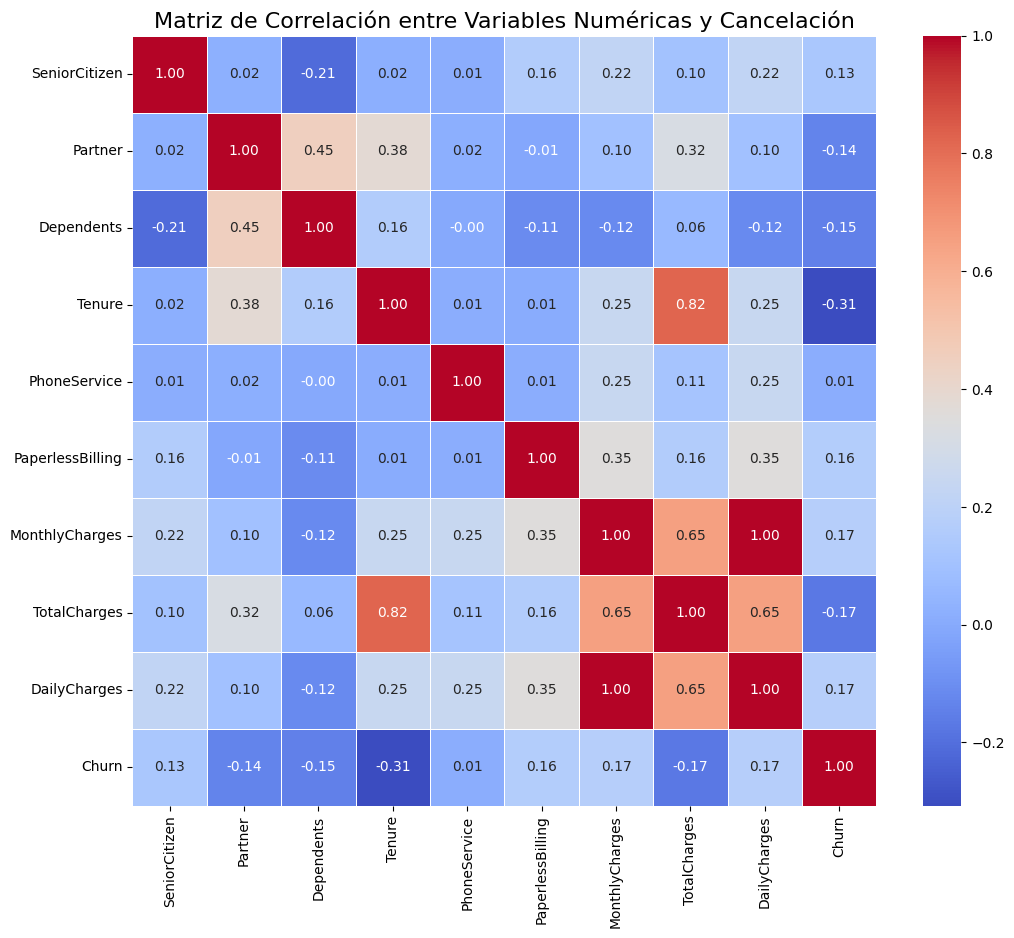

In [18]:

color_palette_churn = {'Yes': '#E57373', 'No': '#64B5F6', 'Unknown': '#BDBDBD'}
churn_order = ['No', 'Yes', 'Unknown']
template_style = "plotly_white"


# Gráfico 4: Matriz de Correlación de Variables Numéricas
correlation_df = df_final.select_dtypes(include=['number']).copy()
# CORRECCIÓN: Usamos .map() para la conversión y manejamos 'Unknown' explícitamente.
correlation_df['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0, 'Unknown': -1})

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)

plt.title('Matriz de Correlación entre Variables Numéricas y Cancelación', fontsize=16)
plt.show()

In [19]:
# ==============================================================================
# 1. RELACIÓN ENTRE LA CUENTA DIARIA (DAILYCHARGES) Y LA EVASIÓN
# ==============================================================================
# Usamos un Box Plot para ver la distribución de los cargos diarios por estado de cliente.
fig_daily = go.Figure()

for churn_status in ['No', 'Yes']: # Nos enfocamos en clientes activos vs. cancelados
    fig_daily.add_trace(go.Box(
        y=df_final[df_final['Churn'] == churn_status]['DailyCharges'],
        name=f'Canceló: {churn_status}',
        marker_color=color_palette_churn[churn_status],
        boxmean=True
    ))

fig_daily.update_layout(
    title='<b>1. Distribución de Cargos Diarios vs. Cancelación</b>',
    yaxis_title='Cargos Diarios (USD)',
    xaxis_title='Estado del Cliente',
    template=template_style,
    showlegend=False
)
fig_daily.show()


# ==============================================================================
# 2.  RELACIÓN ENTRE LA ANTIGÜEDAD (TENURE) Y LA EVASIÓN
# ==============================================================================
# Este análisis es clave. ¿Los clientes nuevos o los antiguos son más propensos a irse?
fig_tenure = go.Figure()

for churn_status in ['No', 'Yes']:
    fig_tenure.add_trace(go.Box(
        y=df_final[df_final['Churn'] == churn_status]['Tenure'],
        name=f'Canceló: {churn_status}',
        marker_color=color_palette_churn[churn_status],
        boxmean=True
    ))

fig_tenure.update_layout(
    title='<b>2. (Sugerencia) Distribución de Antigüedad del Cliente vs. Cancelación</b>',
    yaxis_title='Antigüedad (Meses)',
    xaxis_title='Estado del Cliente',
    template=template_style,
    showlegend=False
)
fig_tenure.show()


# ==============================================================================
# 3. TOP 5 FACTORES CON MAYOR CORRELACIÓN CON RESPECTO A LA CANCELACIÓN
# ==============================================================================
# Usamos la matriz de correlación que ya calculamos para identificar los factores más influyentes.
correlation_df = df_final.select_dtypes(include=['number']).copy()
correlation_df['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0, 'Unknown': -1})
correlation_matrix = correlation_df.corr()

# Obtenemos la correlación de todas las variables con 'Churn'
corr_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Excluimos 'Churn' mismo (que tendrá correlación de 1.0)
corr_with_churn = corr_with_churn.drop('Churn')

# Seleccionamos los 5 más altos (positivos) y los 5 más bajos (negativos) para ver ambos extremos
top_factors = pd.concat([corr_with_churn.head(3), corr_with_churn.tail(3)]).sort_values(ascending=False)

fig_corr = px.bar(
    top_factors,
    x=top_factors.values,
    y=top_factors.index,
    orientation='h',
    title='<b>3. Factores con Mayor Correlación (Positiva y Negativa) con la Cancelación</b>',
    labels={'x': 'Nivel de Correlación', 'y': 'Factor'},
    template=template_style,
    color=top_factors.values,
    color_continuous_scale='RdBu_r' # Rojo para positivo (malo), Azul para negativo (bueno)
)
fig_corr.update_layout(coloraxis_showscale=False) # Ocultar la barra de escala de color
fig_corr.show()

print("\nFactores y su correlación con la cancelación (1.0 es correlación positiva perfecta):")
print(top_factors)



Factores y su correlación con la cancelación (1.0 es correlación positiva perfecta):
DailyCharges        0.173298
MonthlyCharges      0.173298
PaperlessBilling    0.163576
Dependents         -0.147291
TotalCharges       -0.171975
Tenure             -0.307073
Name: Churn, dtype: float64


#📝 INFORME FINAL: ANÁLISIS DE CANCELACIÓN DE CLIENTES EN TELECOMX


**🔹 Introducción**
El presente análisis aborda uno de los desafíos más críticos para cualquier empresa de telecomunicaciones: la evasión de clientes (conocida como Churn). Para TelecomX, retener a los clientes existentes no solo es más rentable que adquirir nuevos, sino que también es un indicador clave de la salud del negocio y la satisfacción del cliente.

**🔹objetivo principal**
de este informe es analizar un conjunto de datos de clientes para identificar los factores que más influyen en su decisión de cancelar el servicio. A través de un proceso de extracción, limpieza y análisis visual, desglosaremos los patrones de comportamiento y las características demográficas de los clientes que se van, con el fin de proporcionar información valiosa para la toma de decisiones estratégicas.

**🔹 Limpieza y Tratamiento de Datos**
Para asegurar la calidad y fiabilidad del análisis, se llevó a cabo un riguroso proceso de preparación de los datos. Las etapas clave fueron:

*   Extracción de Datos: Los datos se importaron directamente desde una fuente
alojada en GitHub. Se utilizó la librería requests para la conexión y pandas para estructurar la información en un DataFrame.

*   Aplanamiento y Renombrado: La estructura anidada del JSON (customer_, phone_, internet_, account_) se aplanó para crear un DataFrame tabular. Las columnas fueron renombradas a identificadores más simples y manejables (ej. customer_customerID se convirtió en CustomerID).

*   Manejo de Duplicados y Nulos:Se verificó y eliminó cualquier fila duplicada para evitar sesgos en el análisis.
Los valores de texto vacíos o no estándar ('no phone service', 'no internet service') fueron unificados a un formato consistente ('no').
La columna TotalCharges (Cargos Totales), que contenía valores no numéricos, fue convertida a un tipo de dato flotante. Los valores nulos resultantes de esta conversión se imputaron utilizando la mediana, una medida robusta ante valores atípicos. Para las columnas categóricas, los valores nulos se rellenaron con la etiqueta 'unknown'.
Transformación y Creación de Variables:

*   Las columnas binarias (como Partner, Dependents, PhoneService) que contenían respuestas "yes"/"no" fueron transformadas a un formato numérico (1/0) para facilitar el análisis de correlación.
Se creó una nueva variable, DailyCharges (Cargos Diarios), dividiendo MonthlyCharges entre 30. Esta nueva métrica permite una comparación más granular del gasto del cliente.
Al final de este proceso, obtuvimos un DataFrame limpio, coherente y listo para el análisis exploratorio.

**🔹 Análisis Exploratorio de Datos (EDA)**

El análisis visual nos permitió descubrir tendencias y patrones clave sobre la cancelación de clientes. A continuación, se resumen los hallazgos de las principales visualizaciones generadas.

**1. Distribución General de la Cancelación**

Un primer vistazo a la distribución de clientes revela que aproximadamente el 26.5% de la base de clientes ha cancelado su servicio. Esta es una tasa de churn significativa que justifica una investigación profunda para identificar sus causas.

**2. Perfil del Cliente que Cancela**

El análisis de variables categóricas nos muestra qué grupos de clientes son más propensos a irse:

*   Tipo de Contrato:
Este es el factor más determinante. Los clientes con contratos mes a mes tienen una tasa de cancelación drásticamente mayor en comparación con aquellos con contratos anuales o de dos años. La flexibilidad de este tipo de contrato facilita la salida.
*Método de Pago: Los clientes que utilizan cheque electrónico como método de pago muestran una mayor propensión a cancelar. Esto podría estar relacionado con fricciones en el proceso de pago o con un perfil de cliente menos comprometido.
*Servicio de Internet: Los clientes con servicio de fibra óptica tienden a cancelar más que aquellos con DSL. Aunque la fibra óptica es un servicio premium, podría estar asociado a costos más altos o a problemas de estabilidad en ciertas áreas.

**3. Relación con Variables Numéricas**
El comportamiento de las variables numéricas también ofrece insights importantes:

* Antigüedad (Tenure): Existe una clara correlación negativa. Los clientes más nuevos son mucho más propensos a cancelar. La lealtad aumenta significativamente a medida que el cliente pasa más tiempo con la empresa. La mediana de antigüedad de los clientes que cancelan es inferior a los 10 meses, mientras que los que se quedan superan los 40 meses.
* Cargos Mensuales (MonthlyCharges): Los clientes que cancelan tienden a tener cargos mensuales más altos. La mediana de los cargos para quienes cancelan es notablemente superior a la de quienes permanecen.

**4. Matriz de Correlación**
El análisis de correlación confirma numéricamente lo observado en los gráficos. Los factores con mayor impacto en la cancelación (Churn) son:

* Correlación Negativa (factores que ayudan a retener):
* Antigüedad (Tenure): La más fuerte. A más tiempo, menor probabilidad de irse.
* Contrato (Contract): Los contratos a largo plazo reducen el churn (nota: esta variable es categórica, pero su impacto es claro).
* Correlación Positiva (factores que impulsan la cancelación):
* Cargos Mensuales (MonthlyCharges): A mayor costo mensual, mayor riesgo.
* Falta de dependientes (Dependents) y pareja (Partner): Los clientes sin ataduras familiares o personales son más propensos a cancelar.

**🔹 Conclusiones e Insights**
El análisis nos permite dibujar un perfil claro del cliente en riesgo de cancelación:

👤 Perfil de Riesgo: Un cliente con poca antigüedad (menos de un año), con un contrato mes a mes, que paga con cheque electrónico y tiene cargos mensuales elevados (posiblemente por un servicio de fibra óptica).

🔑 Factores Clave: La antigüedad y el tipo de contrato son los predictores más potentes de la lealtad del cliente. La flexibilidad del contrato mensual, combinada con un alto costo, crea una "tormenta perfecta" para la cancelación.

💡 Insight Oculto: Aunque la fibra óptica es un servicio superior, su alta correlación con el churn sugiere que el precio asociado puede ser un punto de fricción decisivo. Los clientes pueden ser atraídos por la velocidad, pero no estar dispuestos a sostener el costo a largo plazo si no perciben un valor equivalente.

**🔹 Recomendaciones Estratégicas 🚀**

Basado en los hallazgos, se proponen las siguientes acciones para reducir la tasa de cancelación:

* Fidelizar a Clientes Nuevos:

Acción: Crear un programa de onboarding y seguimiento proactivo durante los primeros 6 meses, que es el período más crítico.
Ejemplo: Ofrecer descuentos especiales o beneficios adicionales al cumplir 3 y 6 meses de contrato.

* Incentivar Contratos a Largo Plazo:

Acción: Diseñar ofertas más atractivas para que los clientes de contratos mes a mes migren a planes anuales o de dos años.
Ejemplo: Ofrecer un descuento significativo, meses de servicio gratis, o la inclusión de un servicio adicional (como Device Protection o Streaming TV) sin costo al firmar un contrato a largo plazo.

* Optimizar la Estrategia de Precios y Pagos:

Acción: Revisar la estructura de precios de la fibra óptica para asegurar que sea competitiva y que el valor percibido justifique el costo.
Ejemplo: Ofrecer planes de fibra óptica con diferentes niveles de velocidad y precio. Además, incentivar el uso de métodos de pago automáticos (como tarjeta de crédito o débito automático) con pequeños descuentos para reducir la fricción asociada al cheque electrónico.

* Desarrollar Paquetes de Servicios ("Bundles"):

Acción: Promocionar paquetes que incluyan varios servicios (Internet, TV, Soporte Técnico). Los clientes con más servicios integrados tienden a tener una mayor "inercia" y son menos propensos a cancelar.
Ejemplo: Crear una campaña dirigida a clientes con un solo servicio para mostrarles los beneficios de un paquete completo a un precio competitivo.